In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# MDS on MNIST (2-dim and 3-dim)

1000


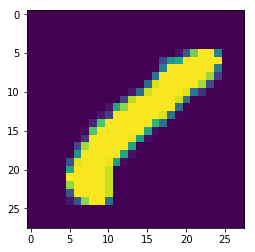

In [3]:
mnist_data = sio.loadmat('MNIST')
mnist_samples = mnist_data['fea']
mnist_labels = mnist_data['gnd']

#load data figure 1 2
N, D = mnist_samples.shape
N, C = mnist_labels.shape
idx = np.concatenate([np.where(mnist_labels.reshape(-1, ) == 1)[0], 
                      np.where(mnist_labels.reshape(-1, ) == 2)[0]])
# random reindex
N = idx.shape[0]
mnist_samples = mnist_samples[idx]
mnist_labels = mnist_labels[idx]

idx = list(range(N))
np.random.shuffle(idx)
mnist_samples = mnist_samples[idx]
mnist_labels = mnist_labels[idx]
# since N is large we only deal with 1000 samples
N = 1000
mnist_samples = mnist_samples[:N]
mnist_labels = mnist_labels[:N]

print (N)
plt.imshow(mnist_samples[999].reshape(28, -1))

In [5]:
#calculate B matrix
D = np.zeros((N, N))
print (mnist_samples.shape)
for i in range(N):
    D[i] = np.sum((mnist_samples[i] - mnist_samples) ** 2, 1)
Di = np.sum(D, 1).reshape(N, -1)
Dj = np.sum(D, 0).reshape(-1, N)
print (Di.shape, Dj.shape, Di.sum().shape)
B = -N * D
B -= Di.sum() * (1/N)
B += Di
B += Dj
B /= 2*N

(1000, 784)
(1000, 1) (1, 1000) ()


In [6]:
Eval, Evec = np.linalg.eig(B)
ind = np.argsort(-Eval)
Eval, Evec = Eval[ind], Evec[:,ind]

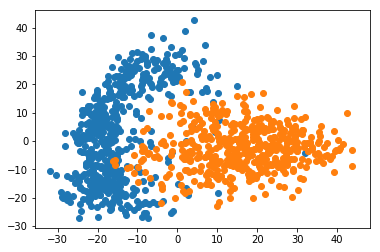

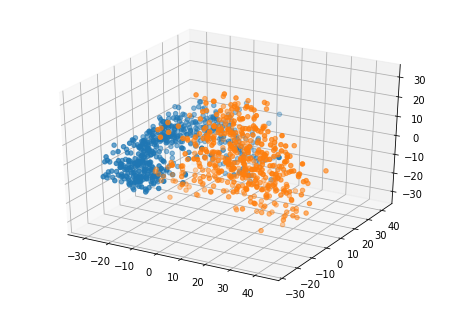

In [7]:
def show(dim, Eval, Evec):
    Eval1, Evec1 = Eval[:dim], Evec[:,:dim]
    Evec1 = Evec1.dot(np.diag(Eval1**0.5))
    fig = plt.figure()
    if dim == 2:
        plt.scatter(Evec1[np.where(mnist_labels==1)[0],0], Evec1[np.where(mnist_labels==1)[0],1])
        plt.scatter(Evec1[np.where(mnist_labels==2)[0],0], Evec1[np.where(mnist_labels==2)[0],1])
    else:
        ax=Axes3D(fig)
        ax.scatter(Evec1[np.where(mnist_labels==1)[0],0], Evec1[np.where(mnist_labels==1)[0],1], Evec1[np.where(mnist_labels==1)[0],2])
        ax.scatter(Evec1[np.where(mnist_labels==2)[0],0], Evec1[np.where(mnist_labels==2)[0],1], Evec1[np.where(mnist_labels==2)[0],2])

show(2, Eval, Evec)
show(3, Eval, Evec)

# hierarchical clustering

In [ ]:
n, m = 17, 8
file = open('data', 'r')
data = []
label = []
for i in range(n):
    s = file.readline().split()
    a = [eval(x) for x in s]
    data.append(a[:m])
    label.append(a[-1]d

data = np.array(data)

def meanDist(c1, c2, data):
    dist = 0
    for c in c1:
        dist += np.sum(np.sqrt(np.sum((data[c] - data[c2])**2, 1)))
    return dist / len(c1) / len(c2)

def Ncut(c1, c2, W, D):
    cut = 0
    for c in c1:
        cut += np.sum(W[c][c2])
    return cut / np.sum(D[c1]) + cut / np.sum(D[c2])

#build kNN graph
def build_kNN(data, K):
    n = data.shape[0]
    indices = np.zeros((n, K))
    distance = np.zeros((n, K))
    for i in range(n):
        dist = np.sum((data[i] - data) ** 2, 1)
        ind = np.argsort(dist)
        indices[i] = ind[1:K+1]
        distance[i] = dist[ind[1:K+1]]
    return distance, indices.astype(np.int32)

def kNN_graph(data, K, sigma):
    n = data.shape[0]
    distance, indices = build_kNN(data, K)
    W = np.zeros((n, n))
    for i in range(n):
        W[i, indices[i]] = np.exp(-distance[i] / (2 * sigma**2))
    W = (W + W.T) / 2
    D = W.sum(1)
    return W, D


def merge(data, criterion, K=3, sigma=1):
    W, D = kNN_graph(data, K, sigma)
    n = data.shape[0]
    label = np.arange(n)
    
    # merge (n - 2) times to get 2 class
    for i in range(n - 2):
        c = list(set(label))
        m = len(c)
        choices = []
        for x in range(m):
            for y in range(x + 1, m):
                if criterion == 'mean':
                    p = meanDist(np.where(label == c[x])[0], np.where(label == c[y])[0], data)
                else:
                    p = Ncut(np.where(label == c[x])[0], np.where(label == c[y])[0], W, D)
                choices.append([p, c[x], c[y]])
        choices.sort()
        x, y = choices[0][1:]
        label[label==y] = x
        
    # relabel to 0 and 1   
    c = list(set(label))
    label1 = np.array(label)
    label[label1 == c[0]] = 0
    label[label1 == c[1]] = 1
    return label

def estimate(la1, la2):
    n = len(la1)
    c1 = np.sum(la1 == la2)
    c2 = np.sum(la1 == (1 - la2))
    print ('Accuracy is', max(c1, c2) / n)

label1 = merge(data, 'mean')
print (label1)
estimate(label, label1)
label1 = merge(data, 'knn', 3, 3)
print (label1)
estimate(label, label1)  
        

[0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0]
Accuracy is 0.6470588235294118
[0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1]
Accuracy is 0.5882352941176471


# decisionTree on 西瓜3.0

In [33]:
n_training = int(n * 0.7 + 0.5)
n_test = n - n_training
data_training, label_training = data[:n_training], label[:n_training]
data_test = data[n_training:], data[n_training:]

def Ent(idx, data, label):
    n = len(idx)
    label1 = label[idx]
    ls = set(label1)
    sum = 0
    for l in ls:
        p = np.sum(label1 == l) / n
        sum -= p * np.log(p) / np.log(2)
    return sum

def gainRatio(idx, attri, data):
    data1 = data[idx]
    n = len(idx)
    values = list(set(data1[:, attri]))
    nv, iv, gain= len(values), 0, 0
    for v in values:
        p = data1[:, attri] == v
        t = np.sum(p) / n
        gain += informationGain(idx[p])
        iv -= np.log(t) / np.log(2)
    gain -= informationGain(idx)
    return iv

def chooseBestAttri(data_idx, attri_idx, data):
    idx = list(attri_idx)
    gain = [gainRatio(data_idx, attri, data) for attri in idx]
    return idx[gain.argmax()]

def creatDTree(data_idx, attri_idx, data):
    best_attri = chooseBestAttri(data_idx, attri_idx, data)
    values = set(data[:, best_attri])
    son = {}
    data1 = data[data_idx]
    for v in values:
        p = data1[:, best_attri]==v
        son[v] = creatDTree(data_idx[p], attri_idx - best_attri, data)
    

In [38]:
np.log(4) / np.log(2)

2.0

In [ ]:
#coding=utf-8
import operator
from math import log
import time

def createDataSet():
    dataSet=[[1,1,'yes'],
            [1,1,'yes'],
            [1,0,'no'],
            [0,1,'no'],
            [0,1,'no']]
    labels = ['no surfaceing','flippers']
    return dataSet, labels

#计算香农熵
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for feaVec in dataSet:
        currentLabel = feaVec[-1]
        if currentLabel not in labelCounts:
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet
    
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1#因为数据集的最后一项是标签
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy -newEntropy
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature
            
#因为我们递归构建决策树是根据属性的消耗进行计算的，所以可能会存在最后属性用完了，但是分类
#还是没有算完，这时候就会采用多数表决的方式计算节点分类
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    return max(classCount)         
    
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) ==len(classList):#类别相同则停止划分
        return classList[0]
    if len(dataSet[0]) == 1:#所有特征已经用完
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]#为了不改变原始列表的内容复制了一下
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, 
                                        bestFeat, value),subLabels)
    return myTree
    
def main():
    data,label = createDataSet()
    t1 = time.clock()
    myTree = createTree(data,label)
    t2 = time.clock()
    print myTree
    print 'execute for ',t2-t1
if __name__=='__main__':
    main()
    